<a href="https://colab.research.google.com/github/daniballester-ai/regressao-linear-maratona-5-10-21/blob/main/maratona_5_10_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏃‍♀️💨 **Análise de Dados de Corrida:**  Uma Abordagem Estatística 📊

**Disciplina:**

* Estatística para Ciência de Dados  

**Professores:**

* 👨‍🏫 Henrique Rocha de Medeiros

* 👨‍🏫 Felipe Macedo Zumba
<br>

Esta análise tem como objetivo geral criar um perfil dos participantes de uma corrida, utilizando técnicas de estatística descritiva e inferencial, e aplicar conceitos de *machine learning* para prever o tempo final de corrida baseado no ritmo dos participantes.  A análise utilizará dados inspirados nos resultados da **Meia Maratona PRF 191 - Extraoficial - 2023**, disponíveis no site da Figueiredo Cronometragem ([https://figueiredoscronometragem.com.br/resultados/g-live.html?f=eventos/2023/MEIAPRF/CORRIDA.clax]).  

Para esta análise, os dados foram baixados do site e uma planilha contendo informações consolidadas dos resultados das provas de 5km, 10km e 21km foi criada.  Esta planilha consolidada, já com tratamento de colunas (apenas as necessárias para esta análise), está disponível no arquivo "maratona-5-10-21.csv".
<br>
<br>

**Objetivos Específicos:**

* 🎯 **Perfil dos participantes:** Descrever a distribuição dos participantes de acordo com o sexo e a distância da prova **(5km, 10km e 21km**). Visualizaremos essa distribuição com tabelas e gráficos.
<br>
<br>
* 🧐 **Comparação de frequências:** Verificar se existe diferença significativa na proporção de homens e mulheres em cada distância (5km, 10km e 21km) utilizando um teste de hipótese apropriado **(teste Qui-quadrado)**.
<br>
<br>
* 🧮 **Modelagem preditiva:** Construir três modelos de regressão linear, um para cada distância **(5km, 10km e 21km)**, para prever o tempo total de corrida com base no ritmo individual dos corredores. Avaliaremos a qualidade de cada modelo através de métricas como o erro quadrático médio **(MSE)** e o R-quadrado **(R²)**.
<br>
<br>
* 🤖 **Predição interativa:** Desenvolver uma aplicação que permita ao usuário inserir o ritmo e a distância da corrida para obter uma estimativa do tempo final, utilizando os modelos de regressão linear construídos.


<br>
A seguir, apresentaremos a análise passo a passo, com código em Python para ser executado no Google Colab, utilizando os dados do arquivo "maratona-5-10-21.csv".
<br>
<br>

##1. 📚 Importação de bibliotecas e leitura dos dados 📚
Vamos importar as bibliotecas necessárias para a análise de dados e a regressão linear, e ler o arquivo CSV para um DataFrame Pandas.

In [4]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import Layout, HTML

In [5]:
# montando o drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Lendo o arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Maratona/maratona-5-10-21.csv', sep=';') #Atualize o caminho para o seu diretório
df.head()

,Sexo,Categoria,Tempo Final,Ritmo,Distancia
0,Masculino,5K-GM,0:15:56.07,03:11,5
1,Masculino,5K-GM,0:15:57.92,03:11,5
2,Masculino,5K-GM,0:16:08.06,03:14,5
3,Masculino,5K-GM,0:16:14.83,03:15,5
4,Masculino,5K-GM,0:16:30.94,03:18,5


In [7]:
# Verificando informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sexo         2878 non-null   object
 1   Categoria    2878 non-null   object
 2   Tempo Final  2879 non-null   object
 3   Ritmo        2879 non-null   object
 4   Distancia    2879 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 112.6+ KB


In [8]:
#checar valores nulos
df.isnull().sum()

,0
Sexo,1
Categoria,1
Tempo Final,0
Ritmo,0
Distancia,0


In [9]:
# Limpeza básica de dados (removendo linhas com valores faltantes)
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2878 entries, 0 to 2878
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sexo         2878 non-null   object
 1   Categoria    2878 non-null   object
 2   Tempo Final  2878 non-null   object
 3   Ritmo        2878 non-null   object
 4   Distancia    2878 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 134.9+ KB


In [11]:
#checar novamente valores nulos
df.isnull().sum()

,0
Sexo,0
Categoria,0
Tempo Final,0
Ritmo,0
Distancia,0


##2. 📊 Perfil dos participantes por sexo e distância 📊
Agora vamos gerar tabelas de frequência para mostrar a distribuição de homens e mulheres em cada distância.

Também iremos criar gráficos para visualizar essa distribuição.

Frequência por Sexo e Distância:
Distancia   5    10   21
Sexo                    
Feminino   707  437  114
Masculino  512  644  464


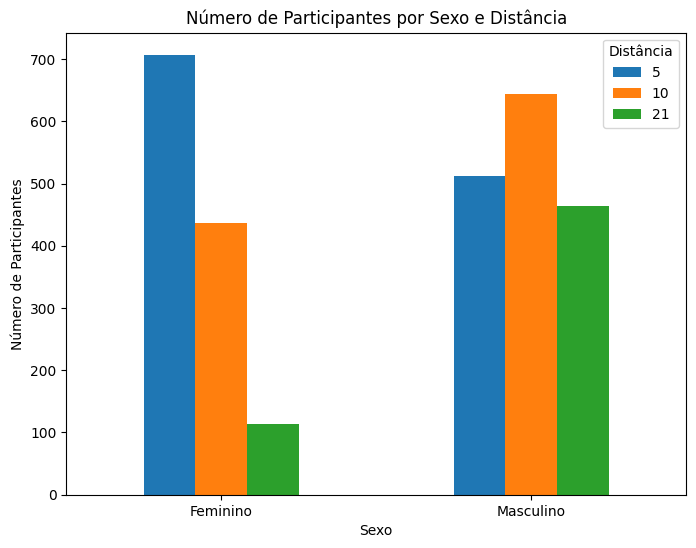


Teste Qui-quadrado para a igualdade de frequência:
Qui-quadrado: 241.05
p-valor: 0.000
grau de liberade: 2.0
A frequência de homens e mulheres nas três distâncias NÃO é a mesma.


In [12]:
# Tabelas de frequência
print("Frequência por Sexo e Distância:")
print(pd.crosstab(df['Sexo'], df['Distancia']))

# Gráficos de barras
dist_cont = df.groupby(['Sexo', 'Distancia'])['Tempo Final'].count().unstack()
dist_cont.plot(kind='bar', figsize=(8, 6))
plt.title('Número de Participantes por Sexo e Distância')
plt.xlabel('Sexo')
plt.ylabel('Número de Participantes')
plt.xticks(rotation=0)
plt.legend(title='Distância')
plt.show()

# Teste de proporção para verificar se a frequência é a mesma nas três distâncias
# Usando chi2_contingency para teste de independência
# Criamos uma tabela de contingência
contingency_table = pd.crosstab(df['Sexo'], df['Distancia'])

# Aplicação do teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nTeste Qui-quadrado para a igualdade de frequência:")
print(f"Qui-quadrado: {chi2:.2f}")
print(f"p-valor: {p:.3f}")
print(f"grau de liberade: {dof:.1f}")

alpha = 0.05 # Nível de significância
if p < alpha:
  print("A frequência de homens e mulheres nas três distâncias NÃO é a mesma.")
else:
  print("A frequência de homens e mulheres nas três distâncias é a mesma (não há evidência suficiente para rejeitar a hipótese nula).")

### No teste Qui-quadrado aplicado à análise da frequência de homens e mulheres nas três distâncias da corrida, as hipóteses são:

* **Hipótese Nula (H0):** A frequência de homens e mulheres é a mesma em todas as três distâncias (5km, 10km e 21km).  Em outras palavras, não há associação entre o sexo do participante e a distância percorrida.

* **Hipótese Alternativa (H1):** A frequência de homens e mulheres *não* é a mesma em todas as três distâncias.  Existe uma associação entre o sexo do participante e a distância percorrida.


O resultado do teste (p-valor próximo de zero) nos leva a rejeitar a hipótese nula e aceitar a hipótese alternativa, indicando que há uma relação entre o sexo do corredor e a distância que ele escolheu correr.


## 3. 📈 Regressão Linear para estimar o tempo total em função do ritmo

Agora vamos transformar os dados de tempo para minutos, realizar uma regressão linear simples com o ritmo como variável preditora e o tempo total como variável dependente, e avaliar a qualidade do modelo.  Para isso, seguem os passos abaixo:

* **Conversão do tempo para minutos:** A coluna "Tempo Final" que está em formato `hh:mm:ss.ms` precisa ser convertida para minutos para facilitar o cálculo da regressão linear.  Uma função será criada para essa conversão.

* **Definição das variáveis:** A variável independente (X) será o "Ritmo" (min/km) e a variável dependente (y) será o "Tempo Final (minutos)".

* **Divisão dos dados:** Os dados serão divididos em conjuntos de treinamento e teste usando `train_test_split` do scikit-learn. Isso permite avaliar o desempenho do modelo em dados não vistos durante o treinamento.

* **Treinamento do modelo:** Um modelo de regressão linear (`LinearRegression`) será treinado usando os dados de treinamento.

* **Previsões:** O modelo treinado fará previsões do tempo final para o conjunto de teste.

* **Avaliação do modelo:** A qualidade do modelo será avaliada usando o erro quadrático médio (MSE) e o coeficiente de determinação (R²).  O MSE mede a média dos quadrados das diferenças entre os valores reais e os valores previstos. O R² indica a proporção da variância da variável dependente que é explicada pelo modelo.

* **Visualização:** Um gráfico de dispersão mostrará os dados reais e a reta de regressão, permitindo uma visualização da relação entre o ritmo e o tempo final.

In [13]:
# função para converter a coluna "Tempo Final" do dataframe de para minutos.
def converter_tempo_para_minutos(tempo_str):
  try:
    horas, minutos, segundos_milissegundos = tempo_str.split(':')
    segundos, milissegundos = segundos_milissegundos.split('.')
    tempo_em_minutos = int(horas) * 60 + int(minutos) + int(segundos) / 60 + int(milissegundos) / 60000
    return tempo_em_minutos
  except ValueError:
    return np.nan

# Aplicar a função de conversão à coluna 'Tempo Final'
df['Tempo Final (minutos)'] = df['Tempo Final'].apply(converter_tempo_para_minutos)

# Exibir as primeiras linhas do DataFrame com a nova coluna
print(df.head())

        Sexo Categoria Tempo Final  Ritmo  Distancia  Tempo Final (minutos)
0  Masculino     5K-GM  0:15:56.07  03:11          5              15.933450
1  Masculino     5K-GM  0:15:57.92  03:11          5              15.951533
2  Masculino     5K-GM  0:16:08.06  03:14          5              16.133433
3  Masculino     5K-GM  0:16:14.83  03:15          5              16.234717
4  Masculino     5K-GM  0:16:30.94  03:18          5              16.501567


In [14]:
# Função para converter a coluna "Ritmo" do dataframe de para minutos.
def converter_ritmo_para_minutos(ritmo_str):
    try:
        # Assuming ritmo_str is in the format 'MM:SS' or 'HH:MM'
        # If it's 'HH:MM:SS', adjust the split accordingly
        parts = ritmo_str.split(':')
        if len(parts) == 2:  # Format 'MM:SS'
            minutes, seconds = parts
            total_minutes = int(minutes) + int(seconds) / 60
        elif len(parts) == 3:  # Format 'HH:MM:SS'
            hours, minutes, seconds = parts
            total_minutes = int(hours) * 60 + int(minutes) + int(seconds) / 60
        else:
            return np.nan  # Handle invalid format
        return total_minutes
    except (ValueError, AttributeError):
        # Handle cases where ritmo_str is not a string or has an unexpected format
        return np.nan

# Aplicar a função de conversão à coluna 'Ritmo'
df['Ritmo (minutos)'] = df['Ritmo'].apply(converter_ritmo_para_minutos)



Regressão Linear para Distância 5km:
Erro quadrático médio (MSE): 0.00
R-quadrado (R²): 1.00


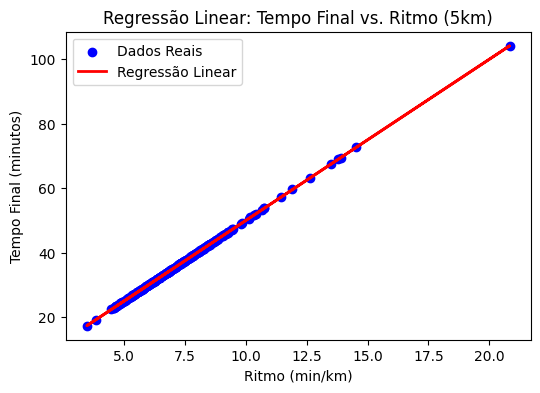


Regressão Linear para Distância 10km:
Erro quadrático médio (MSE): 1.65
R-quadrado (R²): 0.99


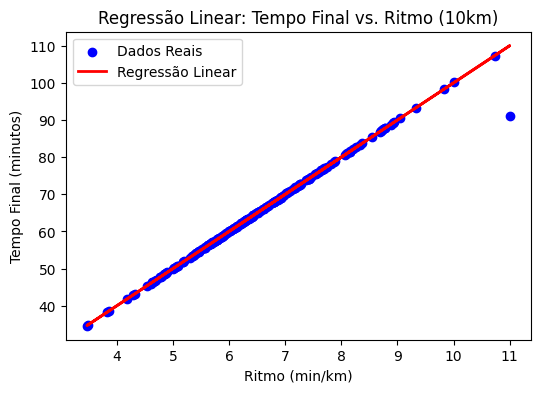


Regressão Linear para Distância 21km:
Erro quadrático médio (MSE): 0.01
R-quadrado (R²): 1.00


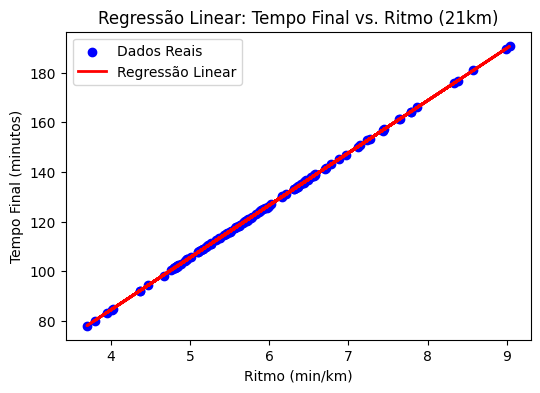

In [15]:
# Lista para armazenar os modelos treinados para cada distancia
models = {}

# Regressão linear para cada distância separadamente
distancias = df['Distancia'].unique()

for dist in distancias:
    # df_dist é o dataframe filtrado por distância
    df_dist = df[df['Distancia'] == dist]
    X = df_dist[['Ritmo (minutos)']]  # variável independente para a distância atual
    y = df_dist['Tempo Final (minutos)']  # variável dependente para a distância atual
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Salva o modelo treinado na lista models[]
    models[dist] = model

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nRegressão Linear para Distância {dist}km:")
    print(f"Erro quadrático médio (MSE): {mse:.2f}")
    print(f"R-quadrado (R²): {r2:.2f}")

    plt.figure(figsize=(6,4)) #cria uma nova figura para cada gráfico
    plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
    plt.title(f'Regressão Linear: Tempo Final vs. Ritmo ({dist}km)')
    plt.xlabel('Ritmo (min/km)')
    plt.ylabel('Tempo Final (minutos)')
    plt.legend()
    plt.show()

##🧮 Calculadora de Tempo de Corrida ⏱️

In [16]:
# Widgets/Campos para entrada do usuário

distancia_input = widgets.Dropdown(
    options=distancias,
    value=5,
    description='Distância (km):',
    disabled=False,
    style={'description_width': 'initial'}, # ou um valor em pixels, como '100px'
    layout=Layout(width='200px') # ou um valor fixo, como '200px'
)

ritmo_input = widgets.Text(
    placeholder='Digite o ritmo (ex: 3:11)',
    description='Ritmo:',
    disabled=False,
    style={'description_width': 'initial'}, # ou um valor em pixels, como '100px'
    layout=Layout(width='200px') # ou um valor fixo, como '200px'
)

calcular_button = widgets.Button(description="📈 Calcular")
limpar_button = widgets.Button(description="🧹 Limpar")
output = widgets.Output()

# Funções para o botâo calcular e limpar
def on_calcular_button_clicked(b):
    with output:
        clear_output()
        try:
            ritmo_str = ritmo_input.value
            minutos, segundos = map(float, ritmo_str.split(':'))
            ritmo = minutos + segundos / 60
            distancia = distancia_input.value
            model = models.get(distancia)
            if model:
                tempo_minutos = model.predict(pd.DataFrame({"Ritmo (minutos)": [ritmo]}))[0]
                tempo_total_segundos = int(round(tempo_minutos * 60))
                tempo_horas = tempo_total_segundos // 3600
                tempo_minutos = (tempo_total_segundos % 3600) // 60
                tempo_segundos = tempo_total_segundos % 60

                print(f"Tempo estimado para {distancia}km com ritmo {ritmo_str}: {tempo_horas:02d}:{tempo_minutos:02d}:{tempo_segundos:02d}")
            else:
                print(f"Modelo não encontrado para a distância {distancia}km.")
        except ValueError:
            print("Formato de ritmo inválido.  Use o formato mm:ss")
        except Exception as e:
            print(f"Erro: {e}")


def on_limpar_button_clicked(b):
    with output:
        clear_output()
        ritmo_input.value = ''

In [17]:
# Associa a função on_calcular_button_clicked ao evento de clique do botão calcular_button e limpar_button.
# Sempre que os botões "Calcular" e "Limpar" fore clicados, a função será executada.
calcular_button.on_click(on_calcular_button_clicked)
limpar_button.on_click(on_limpar_button_clicked)

# Exibe os widgets na interface do usuário.
# Isso faz com que os elementos (campo de texto para o ritmo, menu dropdown para a distância,
# botões "Calcular" e "Limpar", e a área de saída para exibir os resultados) sejam
# renderizados na tela do notebook Jupyter, permitindo a interação do usuário.
display(ritmo_input, distancia_input, calcular_button, limpar_button, output)

Text(value='', description='Ritmo:', layout=Layout(width='200px'), placeholder='Digite o ritmo (ex: 3:11)', st…

Dropdown(description='Distância (km):', layout=Layout(width='200px'), options=(5, 10, 21), style=DescriptionSt…

Button(description='📈 Calcular', style=ButtonStyle())

Button(description='🧹 Limpar', style=ButtonStyle())

Output()